In [5]:
import pickle
import numpy as np
import os

# Function to unpickle files
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_data = pickle.load(fo, encoding='bytes')
    return dict_data

# Path to the dataset directory
data_dir = r"cifar-100-python"  # Update the path here

# Load training data
train_file = os.path.join(data_dir, "train")
train_data = unpickle(train_file)
x_train = train_data[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0
y_train = np.array(train_data[b'fine_labels'])

# Load test data
test_file = os.path.join(data_dir, "test")
test_data = unpickle(test_file)
x_test = test_data[b'data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0
y_test = np.array(test_data[b'fine_labels'])

# Load label names
meta_file = os.path.join(data_dir, "meta")
meta_data = unpickle(meta_file)
label_names = [label.decode('utf-8') for label in meta_data[b'fine_label_names']]

# Print dataset details
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")
print(f"Label names: {label_names}")



Training data shape: (50000, 32, 32, 3), Labels shape: (50000,)
Testing data shape: (10000, 32, 32, 3), Labels shape: (10000,)
Label names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_peppe

In [6]:
from sklearn.model_selection import train_test_split

# Split 60% training and 40% temp (for validation + testing)
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

# Split temp into 20% validation and 20% testing
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Testing set: {x_test.shape}, {y_test.shape}")


Training set: (30000, 32, 32, 3), (30000,)
Validation set: (10000, 32, 32, 3), (10000,)
Testing set: (10000, 32, 32, 3), (10000,)


CNN model

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),  # First MaxPooling layer

    # Second Convolutional Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),  # Second MaxPooling layer

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(units=128, activation='relu'),

    # Dropout Layer to prevent overfitting
    layers.Dropout(rate=0.5),

    # Output Layer
    layers.Dense(units=100, activation='softmax')  # Assuming 100 classes for CIFAR-100
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\USER\Documents\pattern group\pattern\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Training model

In [8]:
# Train the model
history = model.fit(
    x_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_data=(x_val, y_val)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0274 - loss: 4.4604 - val_accuracy: 0.1208 - val_loss: 3.8594
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0966 - loss: 3.9145 - val_accuracy: 0.1648 - val_loss: 3.5592
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1316 - loss: 3.6724 - val_accuracy: 0.2013 - val_loss: 3.3587
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1563 - loss: 3.5204 - val_accuracy: 0.2255 - val_loss: 3.2462
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1738 - loss: 3.4199 - val_accuracy: 0.2416 - val_loss: 3.1425
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1932 - loss: 3.3178 - val_accuracy: 0.2624 - val_loss: 3.0562
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2099 - loss: 3.2443 - val_accuracy: 0.2650 - val_loss: 2.9988
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2145 - loss: 3.1826 - val_accu

Training results

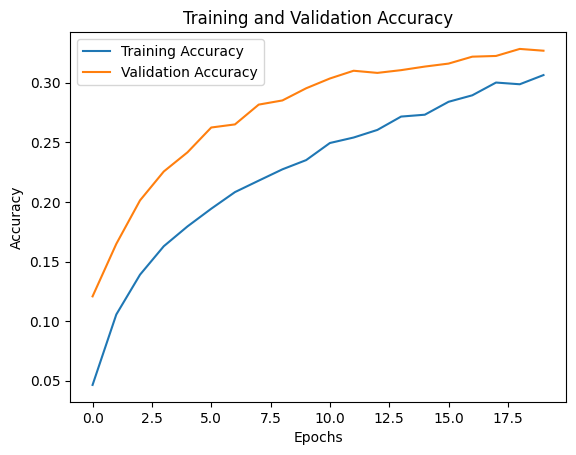

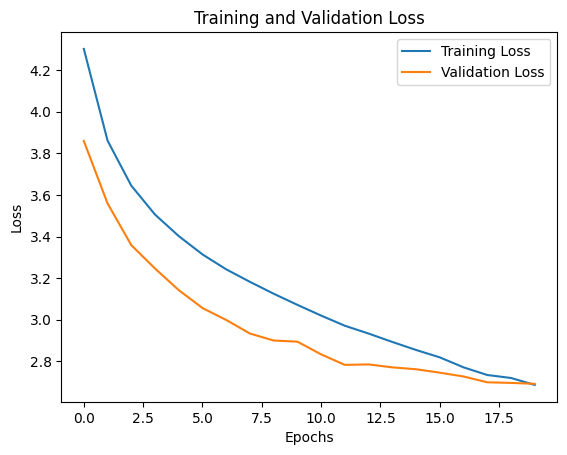

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Updating the model

In [12]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,916 (2.51 MB)

 Trainable params: 658,916 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

training

In [13]:
history = model.fit(
    x_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_data=(x_val, y_val)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.0214 - loss: 4.4790 - val_accuracy: 0.0866 - val_loss: 3.9853
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0848 - loss: 3.9652 - val_accuracy: 0.1504 - val_loss: 3.5797
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1480 - loss: 3.5964 - val_accuracy: 0.1976 - val_loss: 3.3148
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.1862 - loss: 3.3817 - val_accuracy: 0.2324 - val_loss: 3.1435
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.2185 - loss: 3.1933 - val_accuracy: 0.2611 - val_loss: 3.0162
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.2410 - loss: 3.0654 - val_accuracy: 0.2779 - val_loss: 2.9138
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.2676 - loss: 2.9258 - val_accuracy: 0.2953 - val_loss: 2.8210
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.2812 - loss: 2.8409 - 